# Data Cleaning

In this notebook we are going to clean two datasets and join them. First one contains information about power plants all around the world, while the second one - general data regarding countries. We start with the first one.

## Power Plants

Let's begin with importing libraries and loading data to be used.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error 

df = pd.read_csv('global_power_plant_database.csv', low_memory = False)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


Describtion of the above columns:
- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the `source` field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013 (see [2])
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 (see [2])
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 (see [2])
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 (see [2])
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 (see [2])
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013 (see section on this field below)
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 (see section on this field below)
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015 (see section on this field below)
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016 (see section on this field below)
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 (see section on this field below)

In the first step we will drop all the columns that will not be useful in the analysis. Below columns have been choosen to be droped because they carry duplicated information 
or are non-aggregatable (the set will be eventually grouped).

In [3]:
original_df = df.copy()
df = df.drop(['country', 'name', 'source', 'url', 'geolocation_source', 'wepp_id', 'gppd_idnr', 'latitude', 'longitude', 
             'commissioning_year', 'owner', 'year_of_capacity_data'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_long                    34936 non-null  object 
 1   capacity_mw                     34936 non-null  float64
 2   primary_fuel                    34936 non-null  object 
 3   other_fuel1                     1944 non-null   object 
 4   other_fuel2                     276 non-null    object 
 5   other_fuel3                     92 non-null     object 
 6   generation_gwh_2013             6417 non-null   float64
 7   generation_gwh_2014             7226 non-null   float64
 8   generation_gwh_2015             8203 non-null   float64
 9   generation_gwh_2016             9144 non-null   float64
 10  generation_gwh_2017             9500 non-null   float64
 11  generation_gwh_2018             9637 non-null   float64
 12  generation_gwh_2019             

Columns 6-12 store data about energy generated in the period of 2013 - 2019. Great majority of the content of these columns is null. This can be, however, repaired using columns 14-18, which contain estimated values of the energy generated by power plants. Let's check if there are any rows in which, for a given year, both true and estimated values are present. If there are such, let's check a quality of the estimation.

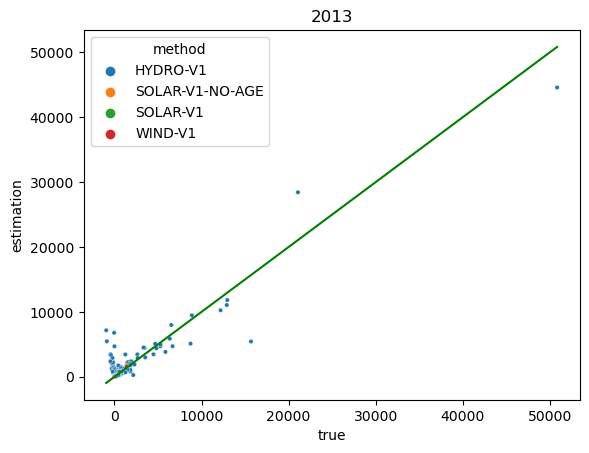

R^2:  0.8791721823593883 
RMSE:  454.40742721894344


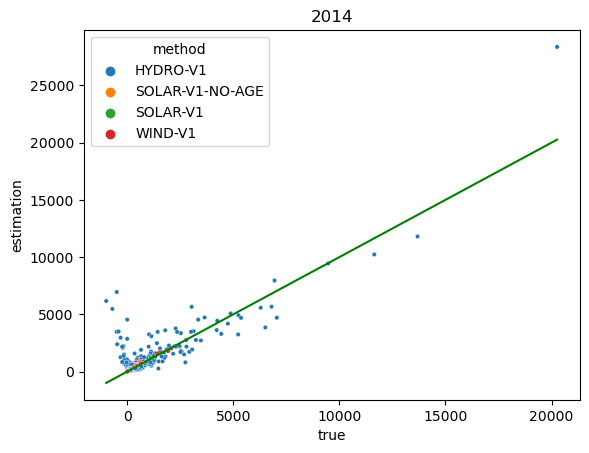

R^2:  0.727916016039724 
RMSE:  376.3091458239661


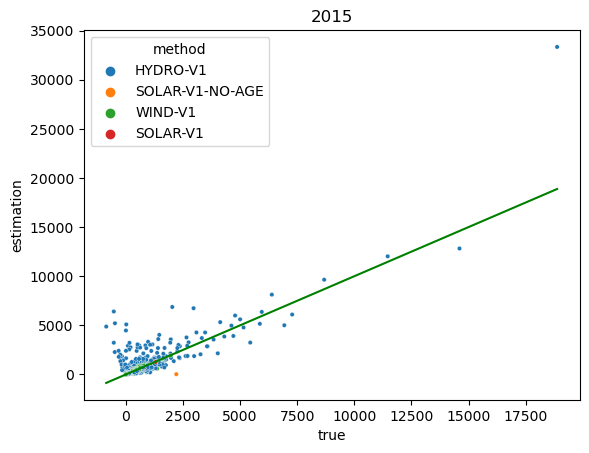

R^2:  0.5722366456593995 
RMSE:  436.7083698962939


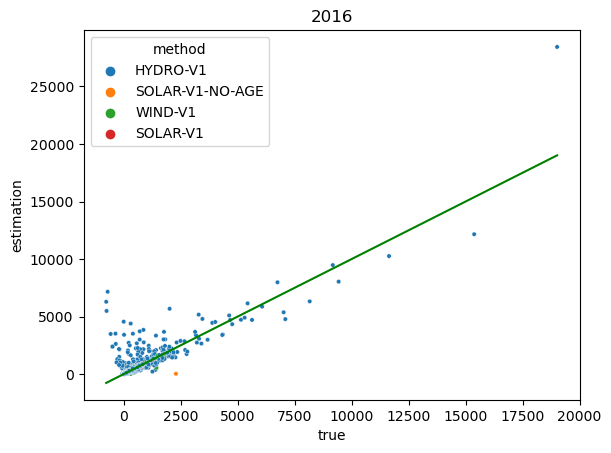

R^2:  0.6894248761284077 
RMSE:  372.1453840140693


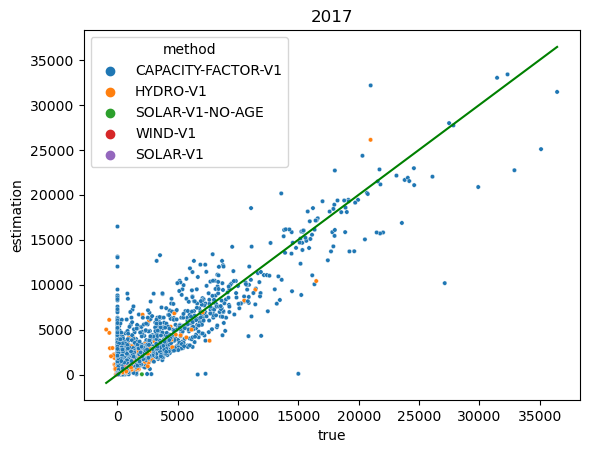

R^2:  0.8298716851348482 
RMSE:  989.7145045427559


In [4]:
years = ['2013', '2014', '2015', '2016', '2017']

for year in years:
    comparison = pd.DataFrame({'true': df['generation_gwh_' + year],'estimation': df['estimated_generation_gwh_' + year], 'method': df['estimated_generation_note_' + year]})
    comparison.dropna(inplace = True)
    sns.scatterplot(data = comparison, x = 'true', y = 'estimation', hue = 'method', s = 10)
    plt.plot([comparison.true.min(), comparison.true.max()], [comparison.true.min(), comparison.true.max()], 'g')
    plt.title(year)
    plt.show()
    print('R^2: ',r2_score(comparison.true, comparison.estimation),'\nRMSE: ', mean_squared_error(comparison.true, comparison.estimation, squared = False))
    

<center> <strong>FURTHER DESCRIBTION WILL BE ADDED SOON<strong> <center>
In the above plots the points was also grouped by methods used to estimate values (these methods are contained in columns 19-23). Except 2015 and 2016 year R^2 score is quite near to one, so that estimation is acceptable. In fact, in 2015 and 2016 this fit does not look really bad visually. The only problem occurs for low values of generation, where the spread is significant. We will however ignore that, as this effect may loose its importance after grouping the data. What is more, it can be seen, that there are negative values of the generation in the columns representing true values - this does not seem to be. Let's examine this issue deeper.

In [5]:
df.describe()

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


Indeed, each of the columns with true generation values have negative minimum value (which is not true for estimated columns). This inconsisntency is connected with the other one. Namely, 'capacity_mw' column contains the maximal power of a power plant. On the other hand, generation columns represent amount of energy generated by a power plant during the year (in particular, 1 GWh unit means that a power plant generated an amount of energy corresponding to working with power of 1 giga watt for 1 hour). Hence, in order to obtain mean effective power of each power plant during each year, we need to transform generation columns to MWh and then divide by number of hours in the year. Having that, we can define capacity factor as mean power of a power plant divided by its maximal power. This factor must be larger or equal zero and lower or equal one   

In [6]:
years_all = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']

for year in years_all:
    factor = df['generation_gwh_' + year]*1000/365/24/df['capacity_mw']
    factor = factor.apply(lambda x: x if x >= 0 and x <= 1 else np.nan)
    df.loc[factor.isna(), 'generation_gwh_' + year] = np.nan
    df.loc[:,'capacity_factor_' + year] = factor

Now, that we get rid of all the false looking true generation values, we can impute estimated values (if such exist) to the empty cells in the true generation columns. After that, columns with estimated values and method used to obtain them can be all dropped.  

In [24]:
df_estimated = df.copy()

for year in years:
    cond = df_estimated.loc[:,'estimated_generation_gwh_' + year].notnull() & df_estimated.loc[:,'generation_gwh_' + year].isnull()
    df_estimated.loc[:,'generation_gwh_' + year].mask(cond, df_estimated.loc[:,'estimated_generation_gwh_' + year], inplace = True)
    
df_estimated.drop(df_estimated.columns[13:24], axis = 1, inplace = True)
df_estimated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_long          34936 non-null  object 
 1   capacity_mw           34936 non-null  float64
 2   primary_fuel          34936 non-null  object 
 3   other_fuel1           1944 non-null   object 
 4   other_fuel2           276 non-null    object 
 5   other_fuel3           92 non-null     object 
 6   generation_gwh_2013   19898 non-null  float64
 7   generation_gwh_2014   20629 non-null  float64
 8   generation_gwh_2015   21631 non-null  float64
 9   generation_gwh_2016   22472 non-null  float64
 10  generation_gwh_2017   33363 non-null  float64
 11  generation_gwh_2018   9455 non-null   float64
 12  generation_gwh_2019   9437 non-null   float64
 13  capacity_factor_2013  6279 non-null   float64
 14  capacity_factor_2014  7078 non-null   float64
 15  capacity_factor_201

Thanks to that procedure, we filled in a lot of null values.
However, imputed values does not have to be right, so we need to once again check, whether all the values are reliable from the point of view of the capacity factor. Moreover, capacity factor columns should be updated using estimated values.

In [25]:
for year in years_all:
    factor = df_estimated['generation_gwh_' + year]*1000/365/24/df['capacity_mw']
    factor = factor.apply(lambda x: x if x >= 0 and x <= 1 else np.nan)
    df_estimated.loc[factor.isna(), 'generation_gwh_' + year] = np.nan
    df_estimated.loc[:,'capacity_factor_' + year] = factor

Nonetheless, it should noted, there are still too many null values and. On the other hand, we are not interested in the time evolution of the generation, so that in the next step, we will create a new columns: 'generation' and 'capacity_factor' containing mean of this quantities over available years. Then, columns with year by year evolution will be dropped.

In [26]:
df_estimated['capacity_factor'] = df_estimated[['capacity_factor_' + year for year in years_all]].mean(axis = 1)
df_estimated['generation'] = df_estimated[['generation_gwh_' + year for year in years_all]].mean(axis = 1)

df_estimated.drop(df_estimated.columns[6:20], axis = 1, inplace = True)
df_estimated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_long     34936 non-null  object 
 1   capacity_mw      34936 non-null  float64
 2   primary_fuel     34936 non-null  object 
 3   other_fuel1      1944 non-null   object 
 4   other_fuel2      276 non-null    object 
 5   other_fuel3      92 non-null     object 
 6   capacity_factor  33422 non-null  float64
 7   generation       33422 non-null  float64
dtypes: float64(3), object(5)
memory usage: 2.1+ MB


In the new columns, there are only 1 514 null values out of 34 936, which is 4.3%, so acceptable. <br>
Besides generation and capacities, we are also interested in sources of the energy generated by each country. First, we will restrict ourselves to the primary fuel column, and second, we will transform this column into dummy variables, as during grouping by countries we need to have numerical values. Also, we will keep only 10 most popular fuels. 

In [27]:
df_estimated['primary_fuel'].value_counts()

Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: int64

In [15]:
df_estimated = df_estimated.join(pd.get_dummies(df_estimated['primary_fuel'], prefix = 'generation'))
df_estimated.drop(['primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel2', 'other_fuel3', 'generation_Storage', 'generation_Other',
                   'generation_Cogeneration', 'generation_Petcoke', 'generation_Wave and Tidal'], axis = 1, inplace = True)
df_estimated.iloc[:,4:] = df_estimated.iloc[:,4:].apply(lambda x: x*df_estimated['generation'])

df_estimated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                34936 non-null  object 
 1   capacity_mw            34936 non-null  float64
 2   capacity_factor        33422 non-null  float64
 3   generation             33422 non-null  float64
 4   generation_Biomass     33422 non-null  float64
 5   generation_Coal        33422 non-null  float64
 6   generation_Gas         33422 non-null  float64
 7   generation_Geothermal  33422 non-null  float64
 8   generation_Hydro       33422 non-null  float64
 9   generation_Nuclear     33422 non-null  float64
 10  generation_Oil         33422 non-null  float64
 11  generation_Solar       33422 non-null  float64
 12  generation_Waste       33422 non-null  float64
 13  generation_Wind        33422 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.7+ MB


In the previuos step, we divided fuel columns by generation column in order to weight fuel columns by amout of energy generated form it.<br>
In the next step, we will group the dataset by countries. Aggregation will be performed with sum - the only exception is 'capacity_factor' column, which will be aggregated using mean. In the end, we will also divide fuel columns by generation column - in this way we will obtain the fraction of the overall energy obtain from particular sources for each country. Also, we will perform standarization of coutries names, as we are going to join this dataset with the next one using that column.

In [19]:
df_estimated.rename(columns = {'country_long': 'country'}, inplace = True)
df_estimated['country'] = df_estimated['country'].str.lower().str.strip().str.replace(r'[\.,:]', '', regex = True)

by_sum = df_estimated.drop('capacity_factor', axis = 1)
by_mean = df_estimated[['country', 'capacity_factor']]

df_grouped_sum = by_sum.groupby('country', as_index = False).sum()
df_grouped_mean = by_mean.groupby('country', as_index = False).mean()
df_grouped = df_grouped_sum.merge(df_grouped_mean, on = 'country')

df_grouped.columns = df_grouped.columns.str.lower()
df_grouped.iloc[:,4:] = df_grouped.iloc[:,4:].apply(lambda x: x/df_grouped['generation'])
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                167 non-null    object 
 1   capacity_mw            167 non-null    float64
 2   generation             167 non-null    float64
 3   generation_biomass     167 non-null    float64
 4   generation_coal        159 non-null    float64
 5   generation_gas         159 non-null    float64
 6   generation_geothermal  159 non-null    float64
 7   generation_hydro       159 non-null    float64
 8   generation_nuclear     159 non-null    float64
 9   generation_oil         159 non-null    float64
 10  generation_solar       159 non-null    float64
 11  generation_waste       159 non-null    float64
 12  generation_wind        159 non-null    float64
 13  capacity_factor        159 non-null    float64
dtypes: float64(13), object(1)
memory usage: 19.6+ KB


## Country profile - data cleaning

Let's read the second dataset

In [29]:
countries = pd.read_csv('country_profile_variables.csv')
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In this case, columns names may serve also as describtion of its content. We will choose only those columns, that may be connected with the amount of CO2 emission of each country. In particular, 'CO2 emission estimates (million tons/tons per capita)' will by crucial in the future analysis.<br>
Moreover, all the columns in the dataset seem to be non-null, but there are object-type columns that should be numerical. Let's examin their content for the presence of non-numerical values.

In [32]:
cols_to_keep = ['country', 'Surface area (km2)', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'GDP: Gross domestic product (million current US$)',
                'GDP growth rate (annual %, const. 2005 prices)', 'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)',
                'Economy: Services and other activity (% of GVA)', 'International trade: Exports (million US$)', 'International trade: Imports (million US$)',
                'CO2 emission estimates (million tons/tons per capita)', 'Energy production, primary (Petajoules)']
countries = countries[cols_to_keep]

obj_num_cols = ['Economy: Agriculture (% of GVA)', 'International trade: Exports (million US$)', 'International trade: Imports (million US$)',
                'GDP growth rate (annual %, const. 2005 prices)', 'Surface area (km2)']

for col in obj_num_cols:
    print(countries[col].loc[~countries[col].str.contains(r'^\d+(\.\d+)?$')].value_counts())

-99     23
~0.0     1
Name: Economy: Agriculture (% of GVA), dtype: int64
-99    18
~0      4
...     1
Name: International trade: Exports (million US$), dtype: int64
-99    18
...     1
Name: International trade: Imports (million US$), dtype: int64
-99      21
-2.4      2
-1.1      2
-20.3     2
-10.2     1
-6.2      1
-1.0      1
-9.9      1
-5.3      1
-2.7      1
-3.7      1
-0.7      1
-~0.0     1
-7.4      1
-0.2      1
-1.8      1
-4.1      1
-0.6      1
-3.8      1
-0.3      1
-3.9      1
-1.7      1
-28.1     1
Name: GDP growth rate (annual %, const. 2005 prices), dtype: int64
-99    3
~0     1
Name: Surface area (km2), dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\2701171105.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(countries[col].loc[~countries[col].str.contains(r'^\d+(\.\d+)?$')].value_counts())
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\2701171105.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(countries[col].loc[~countries[col].str.contains(r'^\d+(\.\d+)?$')].value_counts())
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\2701171105.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(countries[col].loc[~countries[col].str.contains(r'^\d+(\.\d+)?$')].value_counts())
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\2701171105.py:11: UserWarning: This pattern is interpreted as a regula

There are values of type '~0', which will be replaced by '0'. '...' will by replaced by NaN. Moreover, it seem that '-99' value does not represent any true value, so it will be also replaced by NaN.

In [41]:
for col in obj_num_cols:
    countries[col] = countries[col].str.replace(r'~0(\.0)?$', '0', regex = True).str.replace(r'^\.\.\.$', '-99', regex = True)
    countries[col] = countries[col].astype('float')
    countries[col] = countries[col].apply(lambda x: np.nan if x == -99 else x)

In this step, we will perform several transformation:
- rename all the columns, by cutting irrelevant information, replacing spaces with underscores and lowering all the letters 
- transform population columns from thousands to just number of people
- create 'economy' column containing dominating in a given coutry economy branch
- drop remaining 'Economy: ...' columns
- convert 'Energy production,...' column to MWh

In [42]:
countries['Population in thousands (2017)'] = countries['Population in thousands (2017)']*1000
countries.rename(columns = {'Population in thousands (2017)': 'population'}, inplace = True)

countries['Economy'] = countries[[ 'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)',
                                  'Economy: Services and other activity (% of GVA)']].idxmax(axis = 1)
countries.drop([ 'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)'], axis = 1, inplace = True)
economy_dict = {'Economy: Agriculture (% of GVA)': 'agriculture', 'Economy: Industry (% of GVA)': 'industry',
                'Economy: Services and other activity (% of GVA)' : 'services_and_other'}
countries['Economy'] = countries['Economy'].map(economy_dict)

trade_dict = {'International trade: Exports (million US$)': 'trade_export', 'International trade: Imports (million US$)': 'trade_import'}
countries.rename(columns = trade_dict, inplace = True)

countries['Energy production, primary (Petajoules)'] = countries['Energy production, primary (Petajoules)']*1e6/3.6

countries.columns = countries.columns.str.replace('\(.+\)','', regex = True).str.strip().str.lower().str.replace('\s+','_', regex = True).str.replace('[:,]','', regex = True)

In [43]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     229 non-null    object 
 1   surface_area                226 non-null    float64
 2   population                  229 non-null    int64  
 3   population_density          229 non-null    float64
 4   gdp_gross_domestic_product  229 non-null    int64  
 5   gdp_growth_rate             208 non-null    float64
 6   gdp_per_capita              229 non-null    float64
 7   trade_export                210 non-null    float64
 8   trade_import                210 non-null    float64
 9   co2_emission_estimates      229 non-null    int64  
 10  energy_production_primary   229 non-null    float64
 11  economy                     229 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 21.6+ KB


In [44]:
countries.economy.value_counts()

services_and_other    183
industry               41
agriculture             5
Name: economy, dtype: int64

## Joining data

In the last step, we will the two above datasets on 'country' column. However, before we do that, we should check, if all the countries names are written in the same convencion in both datasets. To do that, we will perform join and then list all the countries names that haven't matched.

In [45]:
countries.country = countries.country.str.lower().str.strip().str.replace('[\.,:]', '', regex = True)

matched = countries.merge(df_grouped, how = 'inner', on = 'country')['country']

unmatched_countries = countries.loc[~countries['country'].isin(matched), 'country'].reset_index(drop = True)
unmatched_countries.name = 'countries'
unmatched_df = df_grouped.loc[~df_grouped['country'].isin(matched), 'country'].reset_index(drop = True)
unmatched_df.name = 'df_grouped'

pd.set_option('display.max_rows', 80)
print(pd.concat([unmatched_countries, unmatched_df], axis = 1))

                                    countries    estimated_df
0                              american samoa      antarctica
1                                     andorra         bolivia
2                                    anguilla      cape verde
3                         antigua and barbuda    cote divoire
4                                       aruba  czech republic
5                                     bahamas            iran
6                                    barbados          kosovo
7                                      belize            laos
8                                     bermuda       macedonia
9            bolivia (plurinational state of)         moldova
10            bonaire sint eustatius and saba     north korea
11                     british virgin islands       palestine
12                                 cabo verde          russia
13                             cayman islands     south korea
14                                       chad          taiwan
15      

As we can see, some countries could not match, becasue their names are written in different convencions in the datasets. To resolve that issue, we will first look for names in 'countries' dataset that contain names from 'df_grouped' dataset.

In [46]:
for cn in unmatched_df.values:
    match = unmatched_countries[unmatched_countries.str.contains(cn)]
    if len(match) == 1:
        countries.loc[countries['country'] == match.iloc[0], 'country'] = cn

matched = countries.merge(df_grouped, how = 'inner', on = 'country')['country']
        
unmatched_countries = countries.loc[~countries['country'].isin(matched), 'country'].reset_index(drop = True)
unmatched_df = df_grouped.loc[~df_grouped['country'].isin(matched), 'country'].reset_index(drop = True)

print(pd.concat([unmatched_countries, unmatched_df], axis = 1))

                                  country         country
0                          american samoa      antarctica
1                                 andorra      cape verde
2                                anguilla    cote divoire
3                     antigua and barbuda  czech republic
4                                   aruba          kosovo
5                                 bahamas            laos
6                                barbados     north korea
7                                  belize     south korea
8                                 bermuda          taiwan
9         bonaire sint eustatius and saba         vietnam
10                 british virgin islands             NaN
11                             cabo verde             NaN
12                         cayman islands             NaN
13                                   chad             NaN
14                        channel islands             NaN
15                    china hong kong sar             NaN
16            

A few countries matched; however, still there are names that can match, but have to be transformed manually. After doing that, we will drop rows with empty values.

In [47]:
name_dict = {'cabo verde': 'cape verde', 'czechia': 'czech republic', "lao people's democratic republic": 'laos',
             "democratic people's republic of korea": 'north korea', 'republic of korea': 'south korea', 'viet nam': 'vietnam'}
countries['country'] = countries['country'].replace(name_dict)

joined_df = countries.merge(df_grouped, how = 'inner', on = 'country').dropna()
matched = joined_df['country']
        
unmatched_countries = countries.loc[~countries['country'].isin(matched), 'country'].reset_index(drop = True)
unmatched_df = df_grouped.loc[~df_grouped['country'].isin(matched), 'country'].reset_index(drop = True)

unmatched_df

0         antarctica
1       cote divoire
2           djibouti
3      french guiana
4             gambia
5      guinea-bissau
6             guyana
7             kosovo
8            lebanon
9              sudan
10            taiwan
11    western sahara
Name: country, dtype: object

The above countries from 'df_joined' cannot be present in the final dataset, becasue either correspond to null values or do not have match in the 'countries' dataset. <br>
Also, we finally performed left join of the 'countries' dataset to the 'df_grouped' one.<br>
At the end, we will also create a new column - 'emission_per_capita' - and convert 'economy' columns into dummy variables.

In [48]:
joined_df['emission_per_capita'] = joined_df['co2_emission_estimates']/joined_df['population']

joined_df.set_index('country', inplace = True)
joined_df = joined_df.join(pd.get_dummies(joined_df['economy'], prefix = 'economy'))
joined_df.drop('economy', axis = 1, inplace = True)

joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, afghanistan to zimbabwe
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surface_area                155 non-null    float64
 1   population                  155 non-null    int64  
 2   population_density          155 non-null    float64
 3   gdp_gross_domestic_product  155 non-null    int64  
 4   gdp_growth_rate             155 non-null    float64
 5   gdp_per_capita              155 non-null    float64
 6   trade_export                155 non-null    float64
 7   trade_import                155 non-null    float64
 8   co2_emission_estimates      155 non-null    int64  
 9   energy_production_primary   155 non-null    float64
 10  capacity_mw                 155 non-null    float64
 11  capacity_factor             155 non-null    float64
 12  generation                  155 non-null    float64
 13  generation_biomass       

Such dataset is ready to be analized, so we writing it to a file.

In [49]:
joined_df.to_csv('data_joined.csv')